# Tải bộ dữ liệu từ kaggo

[Tutorial for Kaggle API here](https://www.youtube.com/watch?v=57N1g8k2Hwc)

Cài đặt Kaggle

In [1]:
!pip install -q kaggle

Tải file Kaggle.json từ máy (chứa thông tin tải khoản đăng kí trong kaggle)

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tuandat266","key":"5fa9ee464727f1889dff9402391c1ff8"}'}

Tạo một thư mục kaggle

In [3]:
! mkdir ~/.kaggle

Sao chép file kaggle.json vào thư mục đã tạo

In [4]:
! cp kaggle.json ~/.kaggle/

Cho phép file json hoạt động

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

List all datasets in kaggle

In [6]:
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8372        305  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1173         35  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3684         84  1.0              
omartorres25/honda-data                                     

Sử dụng API để tải xuống tập dữ liệu (được lưu trữ tại Tệp)

In [7]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 98% 15.0M/15.2M [00:01<00:00, 22.3MB/s]
100% 15.2M/15.2M [00:01<00:00, 15.2MB/s]


Giải nén các file của bộ dữ liệu

In [8]:
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


# Tìm hiểu bộ dữ liệu

Thiết lập cơ bản

In [9]:
import pandas as pd
import numpy as np

#Làm cho các giá trị numpy dễ đọc hơn
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [10]:
# Thư viện trợ giúp
import math
import numpy as np
import matplotlib.pyplot as plt

Đọc file dữ liệu .csv 

In [11]:
train_dataset = pd.read_csv("mnist_train.csv")
num_train_dataset = train_dataset.shape[0]

In [12]:
test_dataset = pd.read_csv("mnist_test.csv")
num_test_dataset = test_dataset.shape[0]

Print out some infomation

In [13]:
print(f"Number of training data: {num_train_dataset}")
train_dataset.head()

Number of training data: 60000


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(f"Number of test data: {num_test_dataset}")
test_dataset.head()

Number of test data: 10000


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_dataset.shape

(60000, 785)

In [17]:
test_dataset.shape

(10000, 785)

### Khám phá dữ  liệu đã xử lí

Vẽ một ảnh để xem dữ liệu thế nào

In [18]:
import matplotlib
import matplotlib.pyplot as plt

Trích xuất nhãn

In [ ]:
train_y = train_dataset['label'].astype('float32')
train_x = train_dataset.drop(['label'],axis = 1).astype('int32')
test_x = test_dataset.astype('float32')
train_x.shape, train_y.shape, test_x.shape

((60000, 784), (60000,), (10000, 785))

Mã hóa các nhãn

In [ ]:
encode = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

In thử một ảnh trong bộ dữ liệu

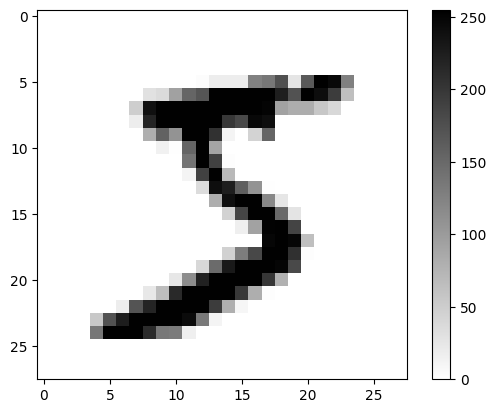

In [ ]:
# Lấy 1 ảnh và chỉnh sửa lại
image = train_x.loc[0]
image = image.to_numpy().reshape(28, 28) 

# Vẽ một ảnh chữ viết tay
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Hiển thị 25 hình ảnh đầu tiên từ tập huấn luyện và hiển thị tên nhãn bên dưới mỗi hình ảnh. Xác minh rằng dữ liệu ở định dạng chính xác và chúng tôi đã sẵn sàng để xây dựng và huấn luyện mạng.

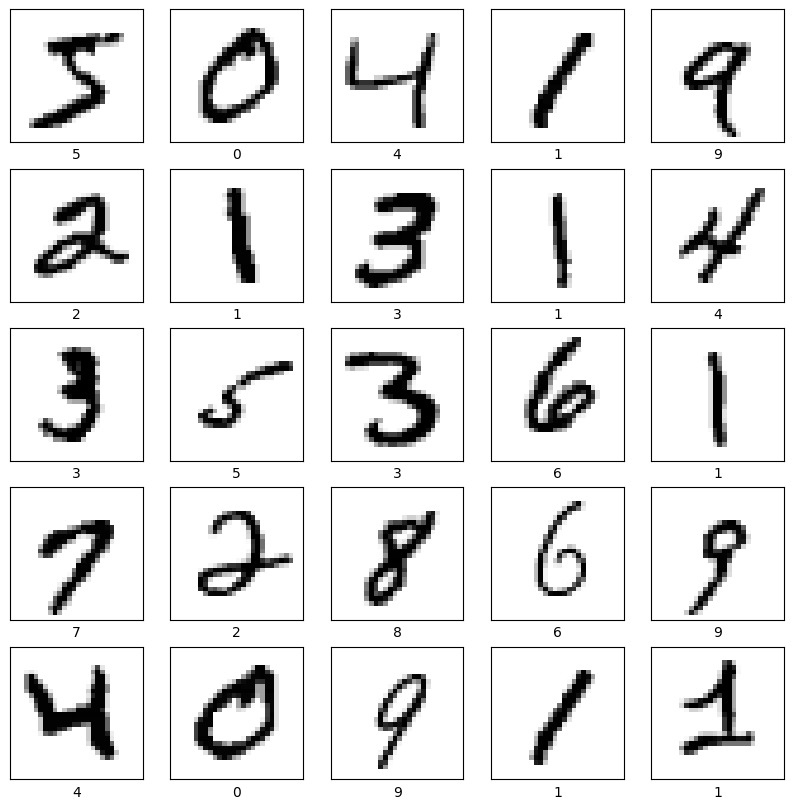

In [ ]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(25):
    image = train_x.loc[i].to_numpy().reshape(28, 28) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(encode[int(train_y[i])])
plt.show()

# Gọi các thư viện cần thiết

Các thư viện cần thiết:
*   os — đọc file và cấu trúc thư mục
*   numpy — sử dụng một số phép toán
*   matplotlib.pyplot — vẽ biểu đồ và hiển thị hình ảnh

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tham số mô hình

In [ ]:
TEST_SIZE = 0.2 #20% of traininig set is used for validation

BATCH_SIZE = 10
IMG_SHAPE  = 28 # Our training data consists of images with width of 28 pixels and height of 28 pixels
EPOCHS     = 10

# Chuẩn bị dữ liệu

In [ ]:
tf.shape(train_x)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([60000,   784], dtype=int32)>

Chia tập dữ liệu thành tập huấn luyện, tập hợp lệ và tập kiểm tra mới

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=TEST_SIZE)
val_x, new_test_x, val_y, new_test_y = train_test_split(val_x,val_y,test_size=TEST_SIZE)

In [ ]:
tf.shape(train_x)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([48000,   784], dtype=int32)>

In [ ]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0

val_x = val_x.values.reshape(-1,28,28,1)
val_x = val_x / 255.0

new_test_x = new_test_x.values.reshape(-1,28,28,1)
new_test_x = new_test_x / 255.0

test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0

train_x.shape, val_x.shape, new_test_x.shape, test_x.shape

AttributeError: ignored

One-hot encoding

In [ ]:
#One Hot Encoding
train_y = tf.keras.utils.to_categorical(train_y,10)
val_y = tf.keras.utils.to_categorical(val_y,10)
new_test_y = tf.keras.utils.to_categorical(new_test_y,10)

train_y.shape, val_y.shape, new_test_y.shape

((48000, 10), (9600, 10), (2400, 10))

In [ ]:
#Printing original labels of top 5 rows
print(train_dataset['label'].head())

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64


In [ ]:
#One hot encoding of the same labels
print(train_y[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Xây dựng mô hình

## Định nghĩa các thông số

In [ ]:
#Nhập các thông số
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

Một biến để dừng sớm

In [ ]:
EPOCHS_COUNT = 0

In [ ]:
#Xác định chức năng gọi lại để dừng quá trình đào tạo của chúng tôi sau khi đạt được độ chính xác có thể chấp nhận được
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            global EPOCHS_COUNT
            EPOCHS_COUNT = epoch
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

## Biên dịch mô hình

Chúng tôi sẽ sử dụng trình tối ưu hóa `adam`. Vì chúng tôi đưa ra phân loại softmax, nên chúng tôi sẽ sử dụng `sparse_categorical_crossentropy` làm hàm mất mát. Chúng tôi cũng muốn xem xét độ chính xác của quá trình đào tạo và xác thực trên mỗi kỷ nguyên khi chúng tôi đào tạo mạng của mình, vì vậy chúng tôi sẽ chuyển đối số chỉ số.

In [ ]:
#Biên dịch và huấn luyện với batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Huấn luyện mô hình
Vì các lô của chúng tôi đến từ một trình tạo (`ImageDataGenerator`), nên chúng tôi sẽ sử dụng `fit_generator` thay vì `fit`.

In [ ]:
history = model.fit(train_x, train_y, 
                    validation_data = (val_x, val_y),
                    batch_size = 50, 
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
960/960 [==============================] - 20s 7ms/step - loss: 0.3182 - accuracy: 0.8958 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 2/10
960/960 [==============================] - 7s 8ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 3/10
960/960 [==============================] - 6s 7ms/step - loss: 0.0584 - accuracy: 0.9828 - val_loss: 0.0437 - val_accuracy: 0.9861
Epoch 4/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0454 - accuracy: 0.9867 - val_loss: 0.0341 - val_accuracy: 0.9899
Epoch 5/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0298 - val_accuracy: 0.9915
Epoch 6/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0261 - val_accuracy: 0.9912
Epoch 7/10
960/960 [==============================] - 8s 9ms/step - loss: 0.0290 - accuracy: 0.9916 - val_loss: 0.0284 - val_accuracy: 0.9918
Epoch

Trực quan hóa kết quả đào tạo

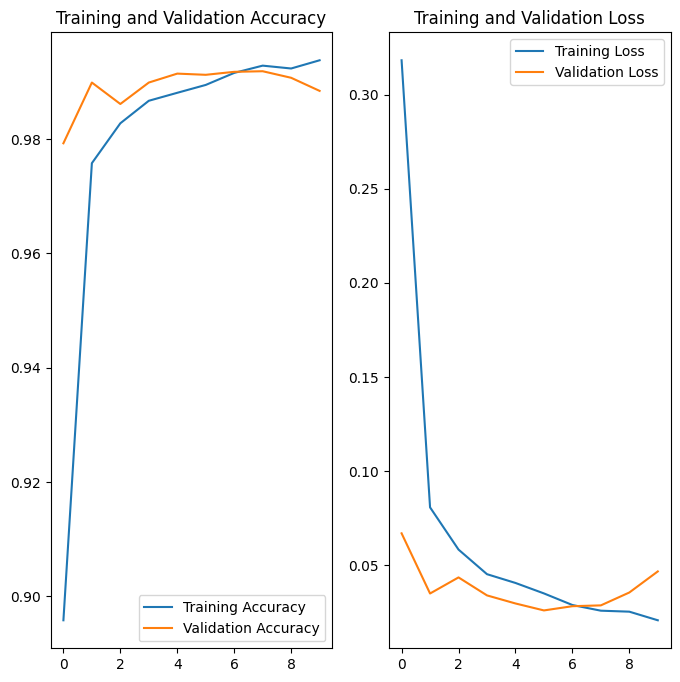

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS_COUNT+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Lưu và tải toàn bộ mô hình


## Định dạng mô hình đã lưu

Các mô hình được lưu ở định dạng này có thể được khôi phục bằng cách sử dụng tf.keras.models.load_model và tương thích với Dịch vụ TensorFlow. Hướng dẫn SavingModel đi vào chi tiết về cách cung cấp/kiểm tra SavingModel.

In [ ]:
# Lưu toàn bộ mô hình dưới dạng SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

## Tải mô hình

Định dạng SavingModel là một thư mục chứa tệp nhị phân protobuf và điểm kiểm tra TensorFlow. Kiểm tra thư mục mô hình đã lưu:

In [ ]:
# thư mục my_model 
!ls saved_model

# Chứa thư mục nội dung, tệp lưu_model.pb và thư mục biến.
!ls saved_model/my_model

my_model
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Tải lại mô hình Keras mới từ mô hình đã lưu:

In [ ]:
model = tf.keras.models.load_model('saved_model/my_model')

# Kiểm tra lại
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

## Tải mô hình xuống

Bạn có thể tải SavingModel xuống đĩa cục bộ của mình bằng cách tạo một tệp zip. Chúng tôi sẽ sử dụng tùy chọn `-r` (recursice) để nén tất cả các thư mục con.

In [ ]:
!zip -r model.zip {'saved_model/my_model'}

  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/fingerprint.pb (stored 0%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/my_model/variables/variables.index (deflated 68%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 93%)
  adding: saved_model/my_model/saved_model.pb (deflated 90%)
  adding: saved_model/my_model/assets/ (stored 0%)


Tệp zip được lưu trong thư mục làm việc hiện tại. Bạn có thể xem thư mục làm việc hiện tại là gì bằng cách chạy:

In [ ]:
!ls

kaggle.json	  mnist_test.csv   model.zip	saved_model
mnist-in-csv.zip  mnist_train.csv  sample_data	so7.png


Sau khi tệp được nén, bạn có thể tải tệp xuống đĩa cục bộ của mình.

In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lệnh `files.download` sẽ tìm kiếm các tệp trong thư mục làm việc hiện tại của bạn. Nếu tệp bạn muốn tải xuống nằm trong một thư mục khác với thư mục làm việc hiện tại, bạn phải bao gồm đường dẫn đến thư mục chứa tệp.

Hãy xem hiệu suất của mô hình của chúng tôi trên bộ thử nghiệm

# Dự đoán

## Tạo dự đoán

Dự đoán cho tập kiểm tra

In [ ]:
results = model.predict(test_x)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

Dự đoán cho bộ thử nghiệm mới

In [ ]:
results = model.predict(new_test_x)
predicted_new_test_labels = np.argmax(results,axis = 1)
print(predicted_new_test_labels)

75/75 [==============================] - 0s 2ms/step
[7 9 1 ... 4 1 9]


## Dự đoán cho bộ thử nghiệm mới

Dự đoán 1 hình ảnh

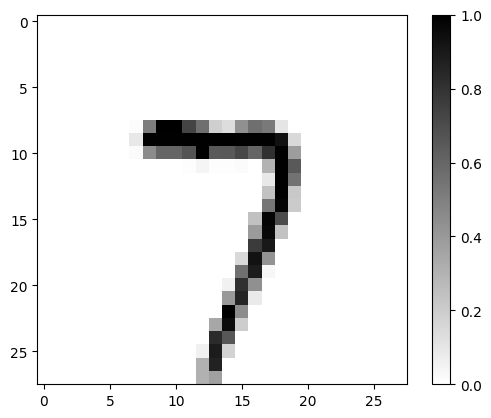

In [ ]:
# lấy 1 ảnh và chỉnh sửa lại
image = new_test_x[0]
image = image.reshape(28, 28) 

# in ảnh
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(encode[predicted_new_test_labels[0]])

7


So sánh với nhãn đúng

In [ ]:
new_test_labels = np.argmax(new_test_y,axis = 1)

In [ ]:
print(new_test_labels[0])

7


Tiếp tục dự đoán với 25 ảnh đầu tiên

Bộ dữ liệu kiểm tra với nhãn đúng

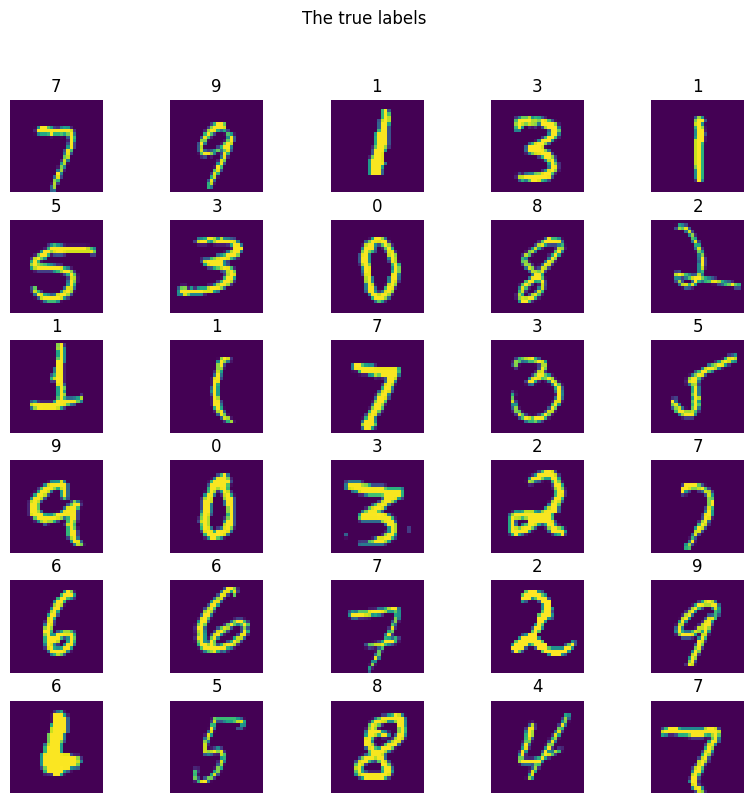

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = new_test_x[n].reshape(28, 28) 
  plt.imshow(image)
  plt.title(new_test_labels[n])
  plt.axis('off')
_ = plt.suptitle("The true labels")

Đây là dự đoán của mô hình được đào tạo của chúng tôi. Nhãn dự đoán đúng có màu xanh lam và nhãn dự đoán sai có màu đỏ

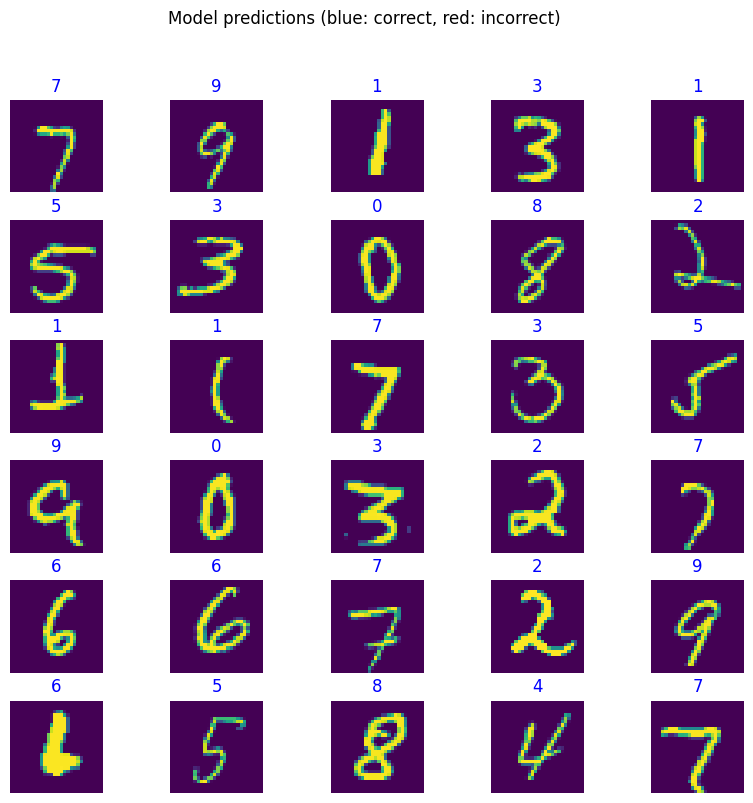

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = new_test_x[n].reshape(28, 28) 
  plt.imshow(image)
  color = "blue" if predicted_new_test_labels[n] == new_test_labels[n] else "red"
  plt.title(predicted_new_test_labels[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Đánh giá

In [ ]:
loss, acc = model.evaluate(new_test_x, new_test_y)
print("Model accuracy: {:5.2f}%".format(100*acc))

75/75 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9925
Model accuracy: 99.25%


Ma trận hỗn loạn:

75/75 [==============================] - 0s 2ms/step


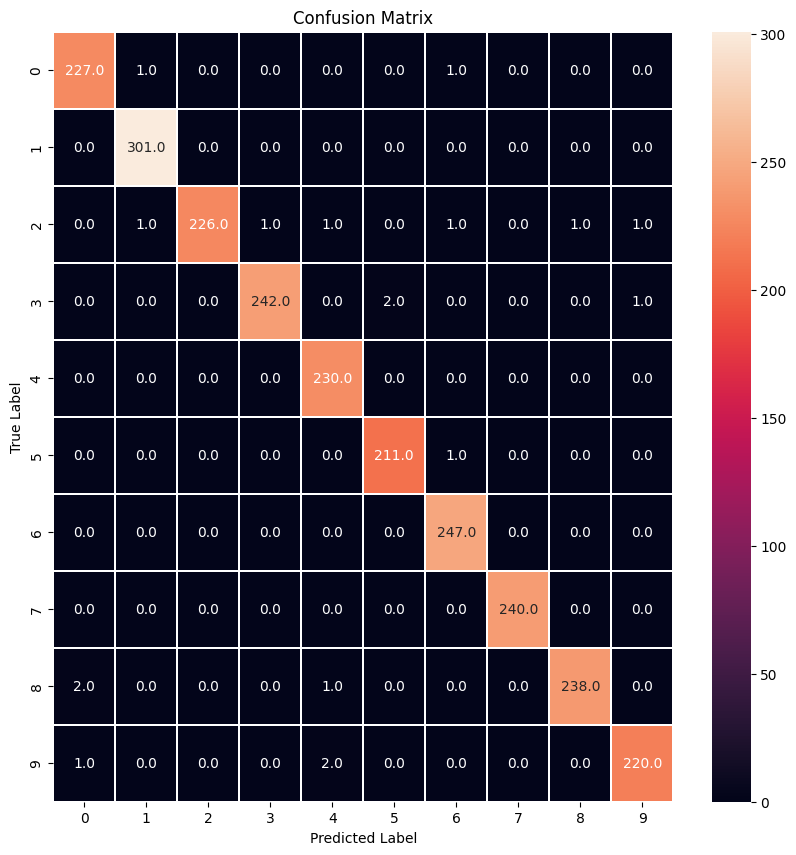

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(new_test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_answer = np.argmax(new_test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_answer, y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt='.1f', ax=ax, xticklabels=list(encode.values()), yticklabels=list(encode.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Thử nghiệm mô hình với ảnh tự làm

## Tải file lên

Tải lên một tập tin và kiểm tra nó! Bạn nên sử dụng hình vẽ màu trắng và nền đen

Ví dụ:

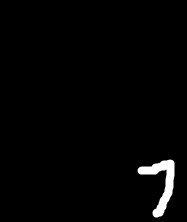

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving so7.png to so7.png


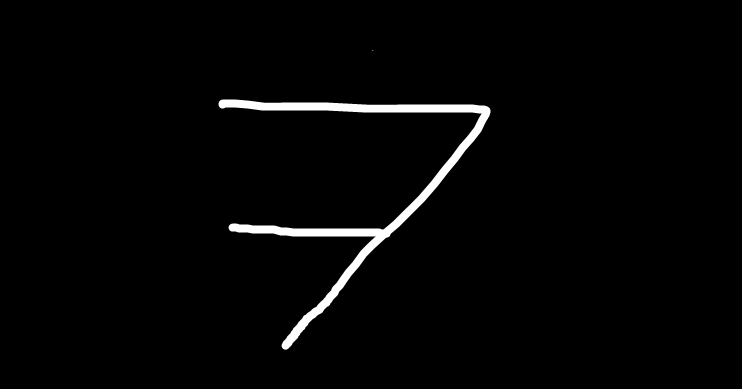

In [ ]:
from IPython.display import Image
Image(filename) #show image with its original size

In [ ]:
import imageio
im = imageio.imread(filename)
print(im.shape)

(389, 742, 3)


<ipython-input-54-09dc5a752e17>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(filename)


## Bước chuẩn bị

Chỉnh sửa ảnh sao cho phù hợp mô hình

In [ ]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
# load the image
img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
# convert to array
type(img)
tf.shape(img)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([28, 28,  1], dtype=int32)>

Các mô hình `tf.keras` được tối ưu hóa để đưa ra dự đoán trên *lô* hoặc bộ sưu tập các ví dụ cùng một lúc. Vì vậy, mặc dù chúng tôi đang sử dụng một hình ảnh duy nhất, chúng tôi cần thêm nó vào danh sách:

In [ ]:
x = np.array([img])

## Kết quả

Ảnh sau khi chỉnh sửa ...

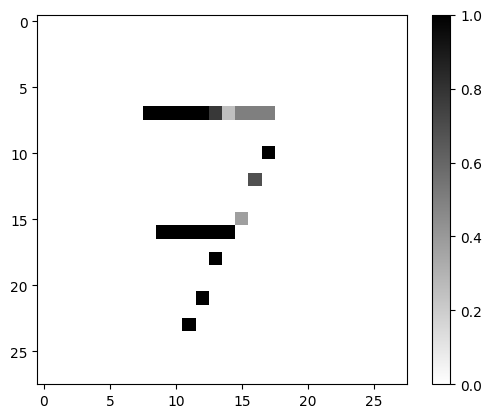

In [ ]:
# Lấy 1 ảnh và  chỉnh sủa
image = x
image = image.reshape(28, 28) 

# Vẽ sơ đồ hình ảnh
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

...Xem mô hình dự đoán

In [ ]:
predict = model.predict(x)
predict

1/1 [==============================] - 0s 307ms/step


array([[0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

**`model.predict` kết quả trùng khớp nhất

In [ ]:
predict = model.predict(x)
label = np.argmax(predict,axis = 1)
encode[label[0]]

1/1 [==============================] - 0s 22ms/step


'7'

Trực quan hóa dự đoán

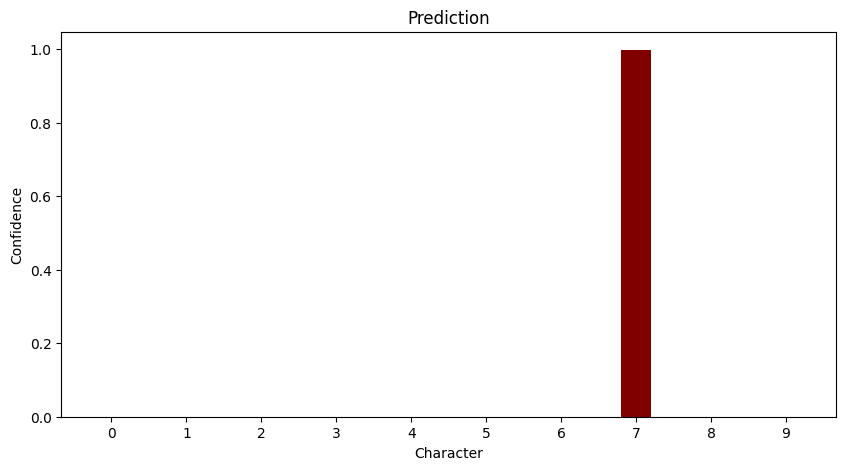

In [ ]:
# Trực quan hóa kết quả dự đoán
x = list(encode.values())
y = list(predict.flatten())
  
fig = plt.figure(figsize = (10, 5))
 
# Tạo biểu đồ cột
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Character")
plt.ylabel("Confidence")
plt.title("Prediction")
plt.show()